In [51]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [52]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [53]:
len(X_train)

60000

In [54]:
len(X_test)

10000

In [55]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
X_train[0].shape

(28, 28)

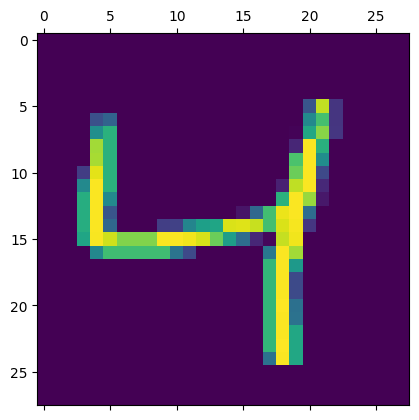

In [57]:
plt.matshow(X_train[2])

In [58]:
y_train[2]

4

In [59]:
X_train = X_train / 255
X_test = X_test / 255

In [60]:
X_train[0]
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [61]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [62]:
X_train_flattened.shape

(60000, 784)

In [63]:
X_test_flattened.shape

(10000, 784)

In [64]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4697 - accuracy: 0.8766
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2831 - accuracy: 0.9217
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9257


In [65]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2647 - accuracy: 0.9261


[0.2646758556365967, 0.9261000156402588]

In [74]:
predicted = model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [82]:
array_position = 32

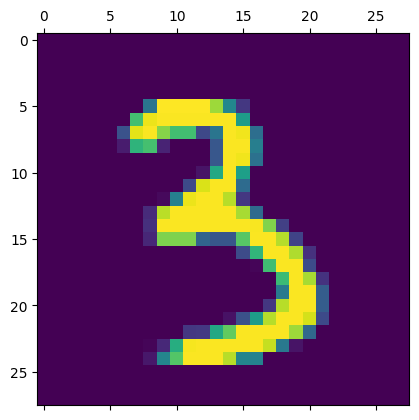

In [83]:
plt.matshow(X_test[array_position])

In [84]:
np.argmax(predicted[array_position])

3

In [85]:
predicted_abs = [np.argmax(i) for i in predicted]
predicted_abs[:5]

[7, 2, 1, 0, 4]

In [86]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [90]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=predicted_abs)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,    9,    2,    3,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   3,    9,  936,   13,    7,    4,   11,    8,   36,    5],
       [   2,    0,   23,  903,    0,   35,    2,   11,   25,    9],
       [   1,    1,    6,    1,  918,    0,    9,    4,   10,   32],
       [   7,    3,    4,   23,    7,  787,   11,    6,   38,    6],
       [   8,    3,   10,    1,    8,   15,  908,    2,    3,    0],
       [   1,    6,   28,    3,    9,    1,    0,  941,    3,   36],
       [   4,    8,    7,   16,    9,   25,    7,   11,  879,    8],
       [   8,    7,    2,    8,   29,    6,    0,   20,   12,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

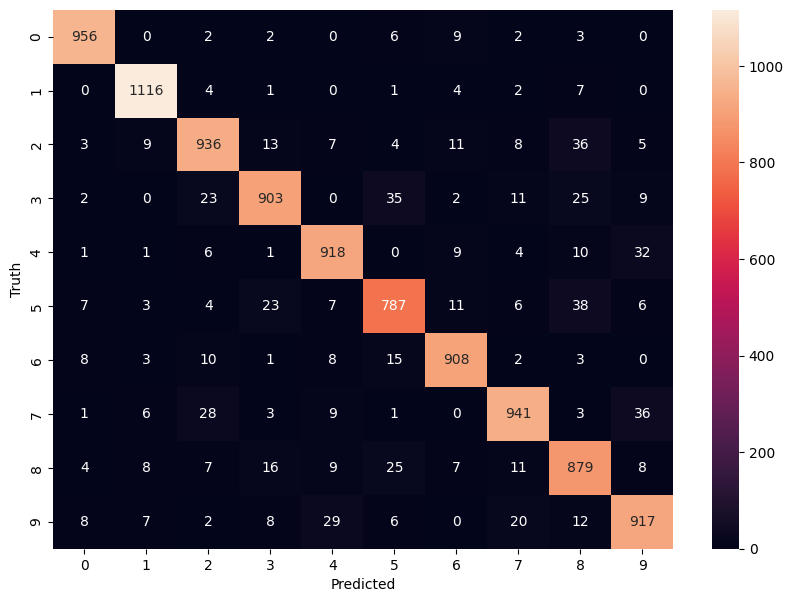

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')